### Michelle Kouba
### Linear Regression (Ridge Regression as well)
### Predicting MPG based on Car Specs

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import and inspect dataframe
auto_df = pd.read_csv('auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Data Preparation


In [ ]:
# Removing the car name column
auto_df = auto_df.iloc[: , :-1]
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
# Inspecting horsepower.
type(auto_df.horsepower)
# Horsepower imported as a series due to non-numeric values.   Finding those now.
auto_df.horsepower.unique()
# Seeing ? in the data.
# Replacing ? with the mean value of horsepower and making horsepower numeric at same time (using to_numeric as replace would have left the object
# type the same).
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, 'coerce').pipe(lambda s:s.fillna(s.mean()))
# Creating dummy variables for the origin column
#Function that populates origin1 = 1 if origin = 1
def recode_origin1(value):
    if value == 1:
        return 1
    else: return 0

# Function that populates origin2 = 1 if origin = 2
def recode_origin2(value):
    if value == 2:
        return 1
    else: return 0

# Function that populates origin3 = 1 if origin = 3
def recode_origin3(value):
    if value == 3:
        return 1
    else: return 0

auto_df['origin1'] = auto_df['origin'].apply(recode_origin1)
auto_df['origin2'] = auto_df['origin'].apply(recode_origin2)
auto_df['origin3'] = auto_df['origin'].apply(recode_origin3)

# Removing the origin column as the dummy variables will make it redundant and
# muddy the waters.
#Creating a backup of the full file.  Just in case.
auto_df_backup = auto_df
#Deleting origin.
auto_df = auto_df.drop('origin', axis=1)


## Exploratory Data Analysis

<AxesSubplot:>

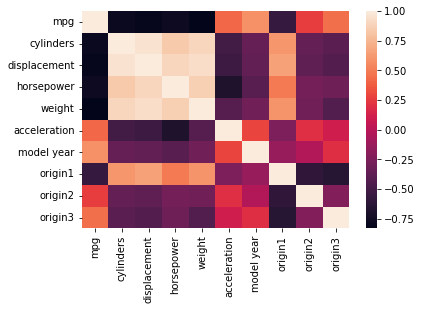

In [ ]:
# Creating heatmap correlation matrix to see which variables are highly correlated.
sns.heatmap(auto_df.corr())

Features that are highly correlated with mpg (our predictor variable) are
cylinders, displacement, horsepower weight and origin=1.

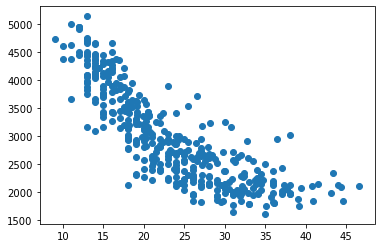

In [ ]:
# Plotting mpg vs weight to analyze their relationship.
plt.scatter(auto_df.mpg, auto_df.weight)

In [ ]:
np.corrcoef(auto_df.mpg, auto_df.weight)

array([[ 1.        , -0.83174093],
       [-0.83174093,  1.        ]])

The graph shows a strong negative relationship between the weight of the vehicle and the corresponding miles per gallon which makes sense.   This is confirmed with the strong negative correlation coefficient of -.83.

In [ ]:
# Specifying the X and y variables for the model.
# X is our variables using to create the predictor model (all but mpg)
X = auto_df.iloc[:, 1:]
# y is the variable we are trying to predict (mpg)
y = auto_df.iloc[:, 0].values


,cylinders,displacement,horsepower,weight,acceleration,model year,origin1,origin2,origin3
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


## Linear Regression

In [ ]:
# Splitting the dataset into the training set and the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Running a linear regression on the training data.
from sklearn.linear_model import LinearRegression
training_model = LinearRegression()
training_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Printing the Coefficients for each of the predictor variables in training model.
pd.DataFrame(training_model.coef_, X.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.402474
displacement,0.025170
horsepower,-0.020903
weight,-0.006666
acceleration,0.191078
model year,0.765449
origin1,-1.925198
origin2,0.724048
origin3,1.201150


In [ ]:
# Printing the Intercept of the training model.
print('The intercept of the training model is',training_model.intercept_)

The intercept of the training model is -17.6101851550968


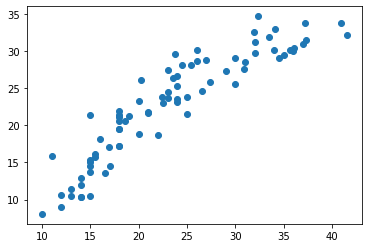

In [ ]:
# Predicting the Testing set results
y_pred = training_model.predict(X_test)
# Predicting the Training set results to use for R-squared, RMSE, and MAE.
y_pred_train = training_model.predict(X_train)
# Plotting the actual test values vs the predicted values for the testing set.
plt.scatter(y_test, y_pred)

## Model metrics

In [ ]:
# Calculating the R squared value of the training model.
from sklearn.metrics import r2_score
print('The R-squared of the training model is',r2_score(y_train, y_pred_train))

The R-squared of the training model is 0.8213002640137388


The scatterplot of the actual versus predicted values confirms the high but not very high R-squared value of .82 meaning the training model explains 82 percent of the variance in the model.   This model is an average to good fit but generally values above 90% are desired.   Some of the points above are well off the prediction line of miles per gallon.

In [ ]:
# Calculating the R squared value of the testing model.
print('The R-squared of the testing model is',r2_score(y_test, y_pred))

The R-squared of the testing model is 0.8267779755698315


The R-squared for the training model is very similar to the testing model showing that the model does a good job of fitting the data without overfitting it.  I would actually expect the training model to have a little higher R-squared when compared to the testing model due to fitting the data to that specific model.

In [ ]:
# Calculating the RMSE on the training model.
from sklearn.metrics import mean_squared_error
#setting squared=False to get the RMSE
print('The RMSE of the training model is', mean_squared_error(y_train, y_pred_train, squared=False))

The RMSE of the training model is 3.2821781970246966


In [ ]:
# Calculating the RMSE on the testing model.
#setting squared=False to get the RMSE
print('The RMSE of the testing model is', mean_squared_error(y_test, y_pred, squared=False))

The RMSE of the testing model is 3.315450944068449


The root mean squared error of both models are very similar, giving us the average distance between the
predicted value and actual value.   We'd like this to be as small as possible, especially given that
mpg only ranges to 40 or so.  Again we would expect the training model to have slightly smaller residuals
given the data was fit to that model but the numbers are very similar.

In [ ]:
# Calculating the MAE on the training model.
from sklearn.metrics import mean_absolute_error
print('The MAE of the training model is', mean_absolute_error(y_train, y_pred_train))

The MAE of the training model is 2.4796581184345996


In [ ]:
# Calculating the MAE on the testing model.
print('The MAE of the testing model is', mean_absolute_error(y_test, y_pred))

The MAE of the testing model is 2.700265726516993


The mean absolute error of both models is similar with the training model being lower as expected.
The hope is to have this number as close to zero as possible, signalling that the average error of
the model is negligible.

## Ridge Regression

In [ ]:
# Performing a ridge regression on the data.
from sklearn.linear_model import Ridge
# Training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
#Ridge regression on training model
ridgeReg.fit(X_train,y_train)
#Testing the training model on the test data.
y_pred = ridgeReg.predict(X_test)
#Testing the training model on the training data for R-squared, RMSE and MAE calculations.
y_pred_train = ridgeReg.predict(X_train)

## Comparing the metrics for the Linear Regression and the Ridge Regression

In [ ]:
# Calculating the R squared value of the training and test model.
print('The R-squared of the training model is',r2_score(y_train, y_pred_train))
print('The R-squared of the testing model is',r2_score(y_test, y_pred))

The R-squared of the training model is 0.8141911004526671
The R-squared of the testing model is 0.8138381769313411


Both models have similar R-squared values and this model is similar in strength to the linear regression model.  The training model has a slightly higher R-squared value as expected but nothing to suggest overfitting.

In [ ]:
# Calculating the RMSE on the training and testing model.
#setting squared=False to get the RMSE
print('The RMSE of the training model is', mean_squared_error(y_train, y_pred_train, squared=False))
print('The RMSE of the testing model is', mean_squared_error(y_test, y_pred, squared=False))

The RMSE of the training model is 3.3468284831161297
The RMSE of the testing model is 3.4370540608421534


The root mean squared error (the average distance between the predicted value and actual value) of both models are very similar.   We'd like this to be as small as possible.  As expected, the training model has slightly smaller residuals given the data was fit to that model but the numbers are very similar.  This model did a very similar job in predicting values when compared to the linear regression models.

In [ ]:
# Calculating the MAE on the training and testing model.
print('The MAE of the training model is', mean_absolute_error(y_train, y_pred_train))
print('The MAE of the testing model is', mean_absolute_error(y_test, y_pred))

The MAE of the training model is 2.483732038921419
The MAE of the testing model is 2.725752976914341


The mean absolute error of both models is similar with the training model being lower as expected.
The hope is to have this number as close to zero as possible, signalling that the average error of
the model is negligible.  both of these numbers are nearly identical to the same statistics from the linear regression models.